# Experiments on real data

### Imports

In [1]:
import time
import numpy as np
import networkx as nx

In [2]:
from paris import paris
from louvain import louvain
from spectral import spectral
from hierarchy import select_clustering, top_clusterings
from real_data import load_dataset
from plot_tools import plot_clusterings, plot_running_times

### Openstreet

In [3]:
data = "openstreet"
G, pos, name = load_dataset(data)

In [4]:
print(nx.info(G))

Name: openstreet
Type: Graph
Number of nodes: 5993
Number of edges: 6957
Average degree:   2.3217


In [5]:
nodes = list(G.nodes())
D = paris(G)
C_list = top_clusterings(D, nodes, 2)

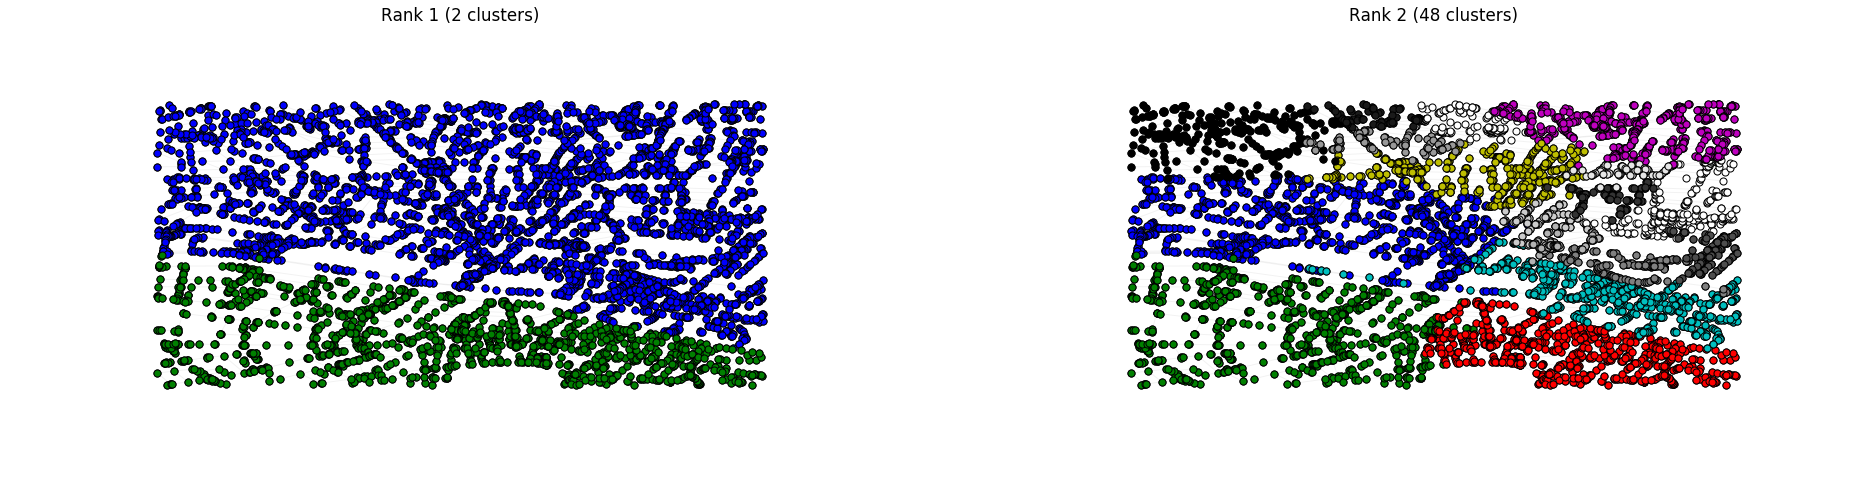

In [6]:
plot_clusterings(G, C_list, pos)

### Openflights

In [9]:
data = "openflights"
G, pos, name = load_dataset(data)

In [10]:
print(nx.info(G))

Name: openflights
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [11]:
nodes = list(G.nodes())
D = paris(G)
C_list = top_clusterings(D, nodes, 3)

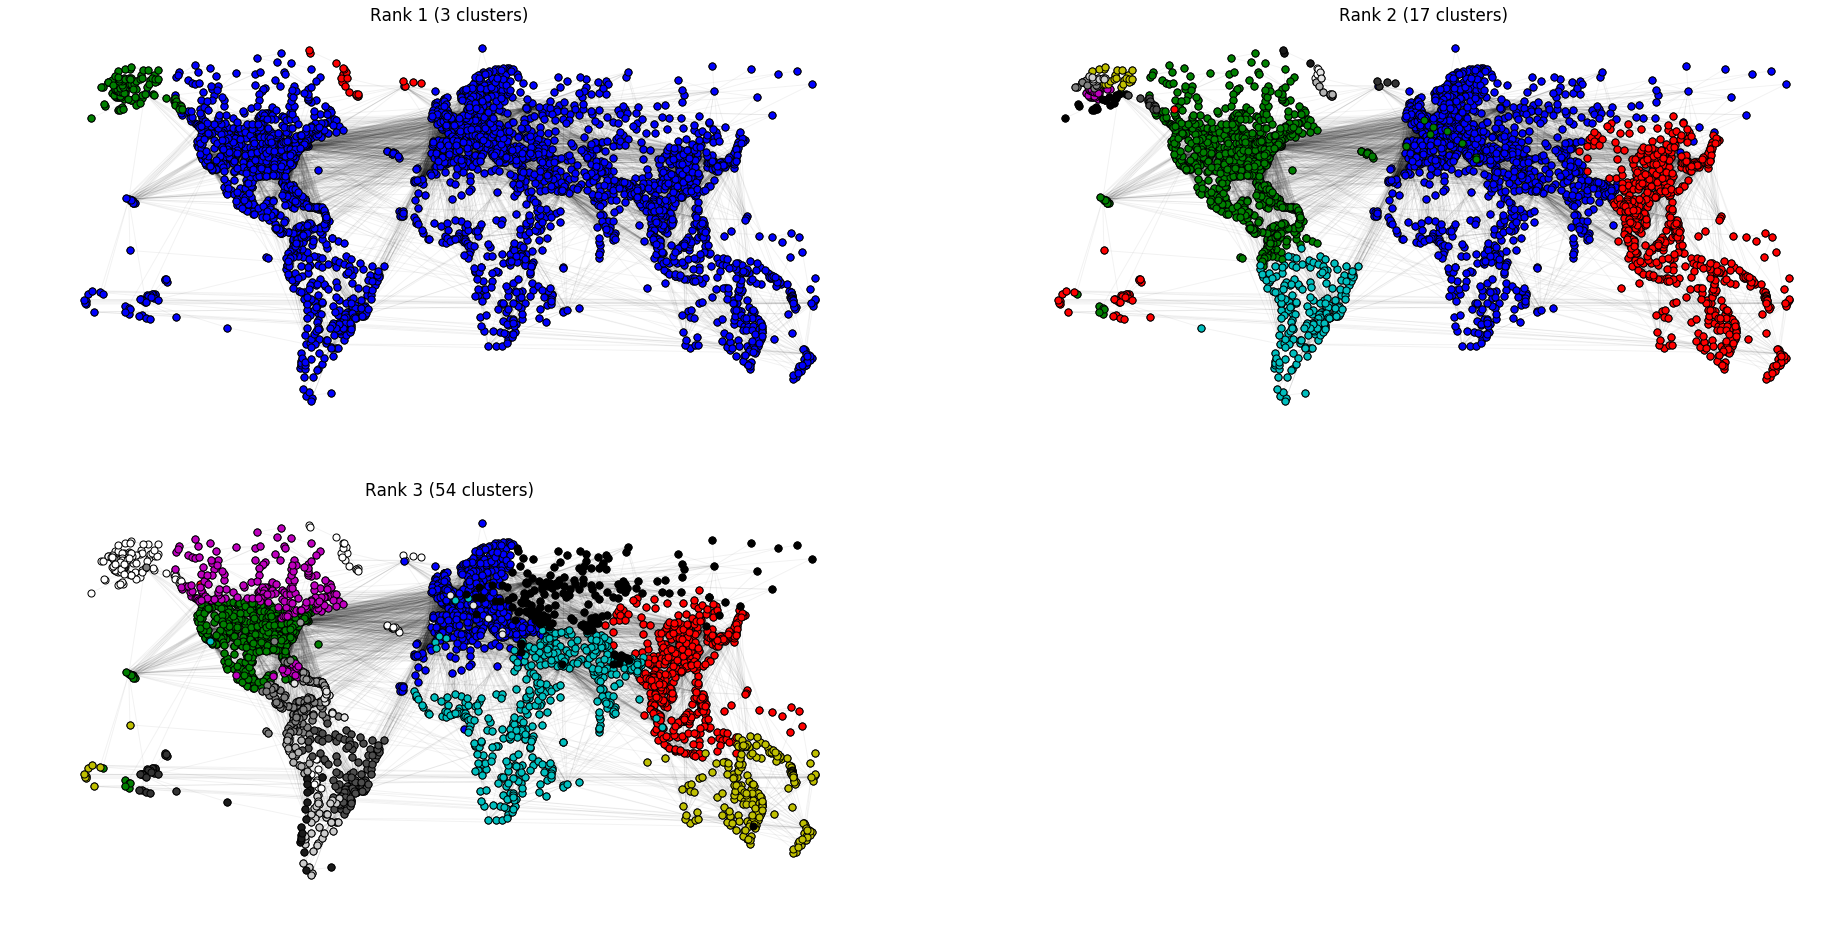

In [12]:
plot_clusterings(G, C_list, pos)

### SchoolsWikipedia

In [15]:
def show_largest_clusters(C, G, name, k = 10, nb_nodes = 10):
    index = np.argsort([-len(c) for c in C])
    for l in range(min(len(C), k)):
        c = C[index[l]]
        index_node = np.argsort([-G.degree(u) for u in c])
        print("#"+str(l+1))
        print("Size = "+str(len(c)))
        cluster_list = ""
        for i in range(min(nb_nodes, len(c))):
            u = c[index_node[i]]
            cluster_list += name[u]+", "
        print(cluster_list[:-2]+"\n")

In [16]:
data = "wikipedia-school"
G, pos, name = load_dataset(data)

In [17]:
print(nx.info(G))

Name: wikipedia-school
Type: Graph
Number of nodes: 4589
Number of edges: 106644
Average degree:  46.4781


In [ ]:
D = paris(G)

In [29]:
nodes = list(G.nodes())
C_list = top_clusterings(D, nodes, 5)

In [30]:
[len(C) for C in C_list]

[3, 70, 248, 462, 645]

In [33]:
# Best clustering (first in the list)
show_largest_clusters(C_list[0], G, name, k = 5)

#1
Size = 3155
United States, United Kingdom, Europe, France, England, Germany, World War II, India, London, English language

#2
Size = 752
Earth, Water, Iron, Sun, Oxygen, Petroleum, Copper, Physics, Electron, Mathematics

#3
Size = 682
Scientific classification, Animal, North America, Chordate, Binomial nomenclature, Argentina, Human, Bird, Carolus Linnaeus, Plant



In [32]:
# Best clustering (last in the list)
show_largest_clusters(C_list[-1], G, name, k = 20)

#1
Size = 149
United States, Canada, California, Chicago, List of rivers by length, Automobile, Minnesota, U.S. state, Transport, Tree

#2
Size = 143
United Kingdom, Jamaica, The Beatles, Opera, Romanticism, Hip hop music, Jazz, Liverpool, Folk music, Piano

#3
Size = 129
Animal, Chordate, Binomial nomenclature, Bird, Carolus Linnaeus, Horse, Bird migration, Extinction, Ostrich, Eagle

#4
Size = 107
Africa, French language, List of sovereign states, Ethiopia, Madagascar, Sudan, Uganda, Somalia, Democratic Republic of the Congo, Tanzania

#5
Size = 106
Spain, Mexico, Brazil, South America, Spanish language, Football (soccer), Peru, Latin America, Chile, Government

#6
Size = 93
Earth, Sun, Astronomy, Star, Solar System, Planet, Jupiter, Mars, Day, Telescope

#7
Size = 55
Electron, Chemical element, Periodic table, List of elements by name, Periodic table (large version), Uranium, Plutonium, Radon, Bismuth, Zirconium

#8
Size = 55
France, Netherlands, Belgium, Dutch language, Holy Roman 

In [ ]:
# Clustering with 100 clusters
n = len(nodes)
k = 100
C, dist = select_clustering(D, nodes, n - k)
show_largest_clusters(C, G, name)

In [ ]:
# Clustering with 500 clusters
n = len(nodes)
k = 500
C, dist = select_clustering(D, nodes, n - k)
show_largest_clusters(C, G, name)

### Running times

In [ ]:
def test_algo(G, algo, nb_samples):
    result = []
    for l in range(nb_samples):
        t0 = time.time()
        if algo == "paris":
            D = paris(G)
        elif algo == "louvain":
            C = louvain(G)
        elif algo == "spectral":
            D = spectral(G)
        t1 = time.time()
        result.append(t1 - t0)
    return result

In [ ]:
def get_running_times(nb_samples = 100):
    datasets = ["openstreet", "openflights", "wikipedia-school"]
    algos = ["paris", "louvain", "spectral"]

    results = [[],[],[]]
    for dataset in datasets:
        print("* " + dataset)
        G, pos, name = load_dataset(dataset)
        for i, algo in enumerate(algos):
            print(algo)
            results[i].append(test_algo(G, algo, nb_samples))
    return results

In [ ]:
# For quick test
nb_samples = 5

results = get_running_times(nb_samples)

In [ ]:
plot_running_times(results)